# Fig 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cmx
from Bio import Phylo
from scipy import stats
import matplotlib

## Datasets

In [3]:
activity_data_path = "../data/20240812_mm_summary_short_normed_updated_with_org_names.csv"
phylo_tree_newick_path = "../data/20240618_100_org_subset.txt"

## 2.a Phylogenetic tree and heatmap
___

In [4]:
cons_included_df = pd.read_csv(activity_data_path)

In [5]:
activity_df = pd.read_csv(activity_data_path)

# remove concensus ADK
activity_df = activity_df[activity_df["org_name"] != "consensus_adk"]


In [6]:
lineage_df = pd.read_csv("../data/20231010_adk_lineage_temp.csv", index_col=0)

In [7]:
activity_df = activity_df.merge(lineage_df[["preferred_name", "temperature"]], left_on="org_name", right_on="preferred_name", how="left")

In [8]:
activity_df

,id,sample_name,assay_type,replicates,kcat_mean_filtered,kcat_stdev_filtered,Km_mean_filtered,Km_stdev_filtered,kcat_mean_normed,kcat_stdev_normed,org_name,preferred_name,temperature
0,T_fusc_ADK,T_fusc_ADK,mm_filtered,6,149.645912,18.328892,20.895411,4.049220,15.984244,1.957778,thermobifida_fusca,thermobifida_fusca,50.0
1,rubrobacter_radiotolerans,rubrobacter_radiotolerans,mm_filtered,7,80.729818,20.111218,35.127061,16.472786,8.623056,2.148155,rubrobacter_radiotolerans,rubrobacter_radiotolerans,37.0
2,porphyromonas_macacae,porphyromonas_macacae,mm_filtered,6,397.009014,99.117683,50.161771,11.028753,42.406030,10.587134,porphyromonas_macacae,porphyromonas_macacae,37.0
3,thermomicrobium_roseum,thermomicrobium_roseum,mm_filtered,8,110.183745,16.354947,74.569592,23.512507,11.769141,1.746934,thermomicrobium_roseum,thermomicrobium_roseum,70.0
4,synechococcus_elongatus,synechococcus_elongatus,mm_filtered,7,138.020793,21.484373,79.398441,18.128128,14.742521,2.294827,synechococcus_elongatus,synechococcus_elongatus,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,C_tepi_ADK,C_tepi_ADK,mm_filtered,7,1717.147950,183.787372,2421.112660,99.419905,183.415048,19.631022,chlorobaculum_tepidum,chlorobaculum_tepidum,46.0
177,D_desu_ADK,D_desu_ADK,mm_filtered,6,6866.851260,382.642335,3317.666520,768.090822,733.474277,40.871471,desulfovibrio_desulfuricans,desulfovibrio_desulfuricans,31.0
178,T_koda_ADK,T_koda_ADK,mm_filtered,5,496.751740,48.615836,3333.730090,1106.494410,53.059927,5.192841,thermococcus_kodakarensis,thermococcus_kodakarensis,60.0
179,T_gamm_ADK,T_gamm_ADK,mm_filtered,6,288.633551,38.182090,3558.775190,762.568981,30.830038,4.078373,thermococcus_gammatolerans,thermococcus_gammatolerans,88.0


In [33]:
len(ids)

181

In [7]:
tree = Phylo.read(phylo_tree_newick_path, "newick")

# add all terminal nodes to a list
terminals = []
for clade in tree.find_clades():
    if clade.is_terminal():
        terminals.append(clade.name)

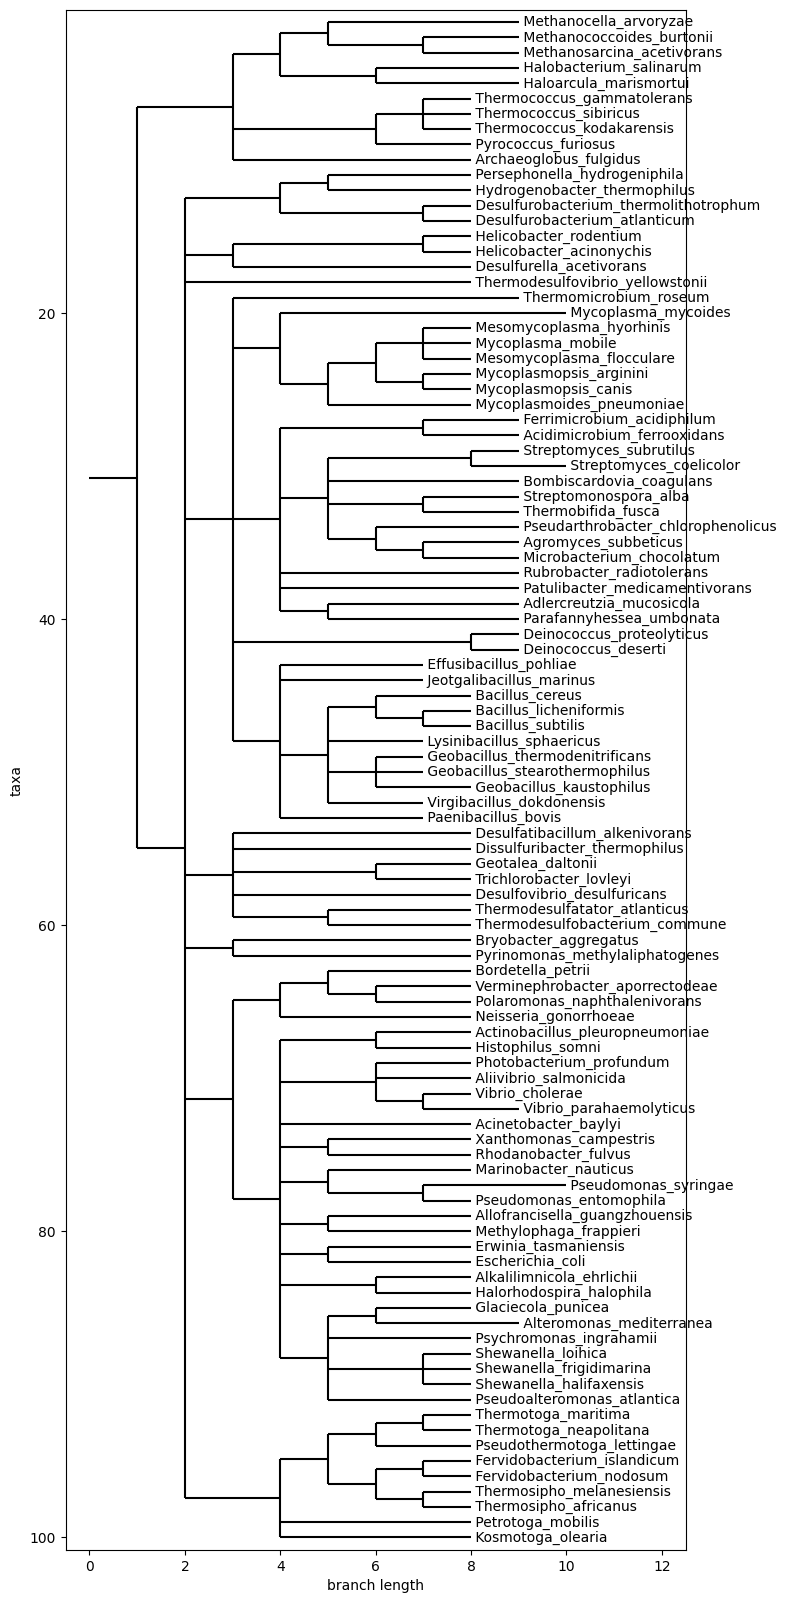

In [8]:
def label_func(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return ""

fig = plt.figure(figsize=(8, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, label_func=label_func)


In [9]:
# sort activity df to match terminals
tree_activity_df = activity_df.copy().set_index("org_name")
tree_activity_df = tree_activity_df.loc[[i.lower() for i in terminals]]

In [ ]:
heatmap_df = tree_activity_df[["kcat_mean_normed", "Km_mean_filtered", "temperature"]].copy()
# remove index
heatmap_df.reset_index(inplace=True)

heatmap_df["kcat/Km"] = heatmap_df["kcat_mean_normed"] / (heatmap_df["Km_mean_filtered"] * 1e-6)

heatmap_df["Km_mean_filtered"] = np.log10(heatmap_df["Km_mean_filtered"] * 1e-6)

heatmap_df["kcat_mean_normed"] = np.log10(heatmap_df["kcat_mean_normed"])

# drop organism column
heatmap_df.drop("org_name", axis=1, inplace=True)


heatmap_df.columns = ["k_cat", "km", "temp", "kcat/km"]

heatmap_df = heatmap_df[["temp","k_cat", "km", "kcat/km",]]


In [55]:
cons_data = pd.read_csv(activity_data_path)
cons_data = cons_data[cons_data["org_name"] == "consensus_adk"]
cons_data = cons_data[["kcat_mean_normed", "Km_mean_filtered",]]
cons_data["kcat/km"] = cons_data["kcat_mean_normed"] / (cons_data["Km_mean_filtered"] * 1e-6)
cons_data["kcat_mean_normed"] = np.log10(cons_data["kcat_mean_normed"])
cons_data["Km_mean_filtered"] = np.log10(cons_data["Km_mean_filtered"] * 1e-6)
cons_data["temp"] = None
cons_data.columns = ["k_cat", "km", "kcat/km", "temp"]
cons_data

,k_cat,km,kcat/km,temp
128,0.731529,-3.094817,6704.182194,None


In [11]:
#https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)
    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)
    return newcmap

In [56]:
# add consensus data to end of heatmap_df
heatmap_df = pd.concat([heatmap_df, cons_data], axis=0)

In [49]:
temp_cmap = shiftedColorMap(cmx.coolwarm, midpoint=0.35, name="shifted_coolwarm1")

/tmp/ipykernel_592976/2282275216.py:43: UserWarning: Trying to register the cmap 'shifted_coolwarm1' which already exists.
  plt.register_cmap(cmap=newcmap)


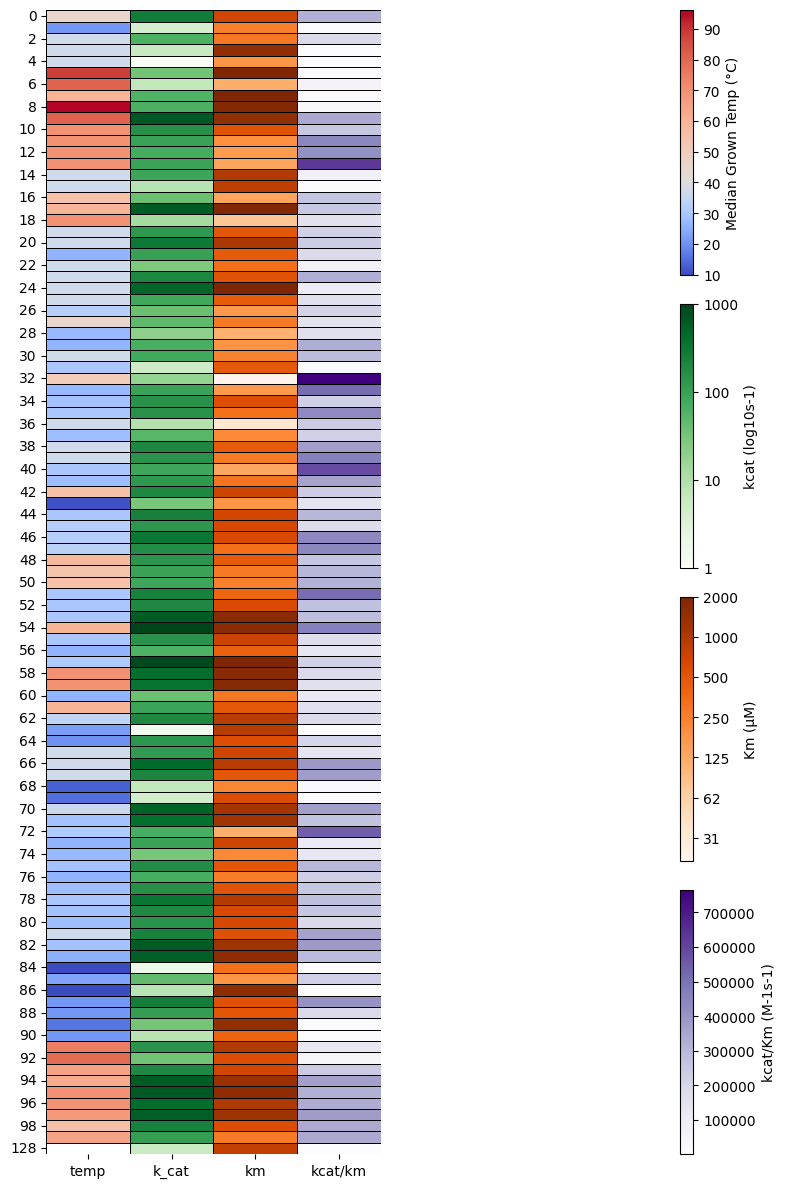

In [57]:

plt.figure(figsize=(8, 12))
ax1 = plt.subplot(4,2,(1,7))
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,4)
ax4 = plt.subplot(4,2,6)
ax5 = plt.subplot(4,2,8)
heatmap_axis = ax1
colormap_dict = {"k_cat": (cmx.Greens, ax3, "kcat (log10s-1)"),
                "km": (cmx.Oranges, ax4, "Km (µM)"),
                "kcat/km": (cmx.Purples, ax5, "kcat/Km (M-1s-1)"),
                "temp": (temp_cmap, ax2, "Median Grown Temp (°C)")}
for col in colormap_dict.keys():
    
    vmin = heatmap_df[col].min()
    vmax = heatmap_df[col].max()
    if col == "kcat":
        vmax = 1000
    if col == "km":
        vmin = np.log10(.000020)
        vmax = np.log10(.0020)
    cmap = colormap_dict[col][0]
    mask = heatmap_df.copy()
    for col_m in mask:
        mask[col_m] = col != col_m

    sns.heatmap(data=heatmap_df,
                #annot=activity_df["organism"], annot_kws={'size': 'large'},
                fmt="g",
                mask=mask,
                cmap=cmap, vmin=vmin, vmax=vmax, cbar=False, ax=heatmap_axis, linewidths=0.5, linecolor='black')


for col_name, bar_info in colormap_dict.items():
    if col_name == "k_cat":
        # do log scale colorbar
        heatmap_axis = ax1
        colormap, ax, label = bar_info

        scalarmappaple = cmx.ScalarMappable(cmap=colormap)
        scalarmappaple.set_array(heatmap_df[col_name].to_list() + [3])
        # make ticks linear scale
        cbar = fig.colorbar(scalarmappaple, label=label, ax=ax,  )
        cbar.set_ticks([0, 1, 2, 3])
        
        ticks = cbar.get_ticks()
        ticks = 10**ticks
        cbar.set_ticklabels(ticks)
        #cbar.set_ticklabels(["1", "10", "100", "1000"])

        ax.set_axis_off()

    #     fig.colorbar(scalarmappaple, label=label, ax=ax,)
    #     ax.set_axis_off()
    elif col_name == "km":
        # do log scale colorbar
        heatmap_axis = ax1
        colormap, ax, label = bar_info

        scalarmappaple = cmx.ScalarMappable(cmap=colormap)
        scalarmappaple.set_array(heatmap_df[(heatmap_df[col_name] < np.log10(.002)) & (heatmap_df[col_name] > np.log10(.000020))][col_name].to_list() + [np.log10(.002)])
        # make ticks linear scale
        cbar = fig.colorbar(scalarmappaple, label=label, ax=ax,)
        cbar.set_ticks([np.log10(.00003125),np.log10(.0000625), np.log10(.000125), np.log10(.000250), np.log10(.000500), np.log10(.001000), np.log10(.002000)])
        ticks = cbar.get_ticks()
        ticks = [round(i) for i in 10**ticks / 1e-6]
        cbar.set_ticklabels(ticks)
        #cbar.set_ticklabels(["1", "10", "100", "1000"])

        ax.set_axis_off()

    #     fig.colorbar(scalarmappaple, label=label, ax=ax,)
    #     ax.set_axis_off()
    else:
        colormap, ax, label = bar_info
        
        scalarmappaple = cmx.ScalarMappable(cmap=colormap)
        scalarmappaple.set_array(heatmap_df[col_name])
        fig.colorbar(scalarmappaple, label=label, ax=ax,)
        ax.set_axis_off()        

ax.set_facecolor('white')
plt.rcParams['pdf.fonttype'] = 42

plt.tight_layout()
plt.savefig("../data/fig_pdfs/fig_2_new_heatmap.pdf")
plt.show()

## 2.b
___

In [13]:
activity_df.set_index("org_name", inplace=True)

## 2.c
___

In [14]:
activity_df["kcat/km"] = activity_df["kcat_mean_normed"] / (activity_df["Km_mean_filtered"] * 1e-6)


In [15]:
activity_df = activity_df[(activity_df["Km_mean_filtered"] < 2000) & (activity_df["Km_mean_filtered"] > 20)]

In [17]:
activity_df.reset_index(inplace=True)

In [18]:
# which org has a nan for temperature?
activity_df[activity_df["temperature"].isna()]

,org_name,id,sample_name,assay_type,replicates,kcat_mean_filtered,kcat_stdev_filtered,Km_mean_filtered,Km_stdev_filtered,kcat_mean_normed,kcat_stdev_normed,preferred_name,temperature,kcat/km


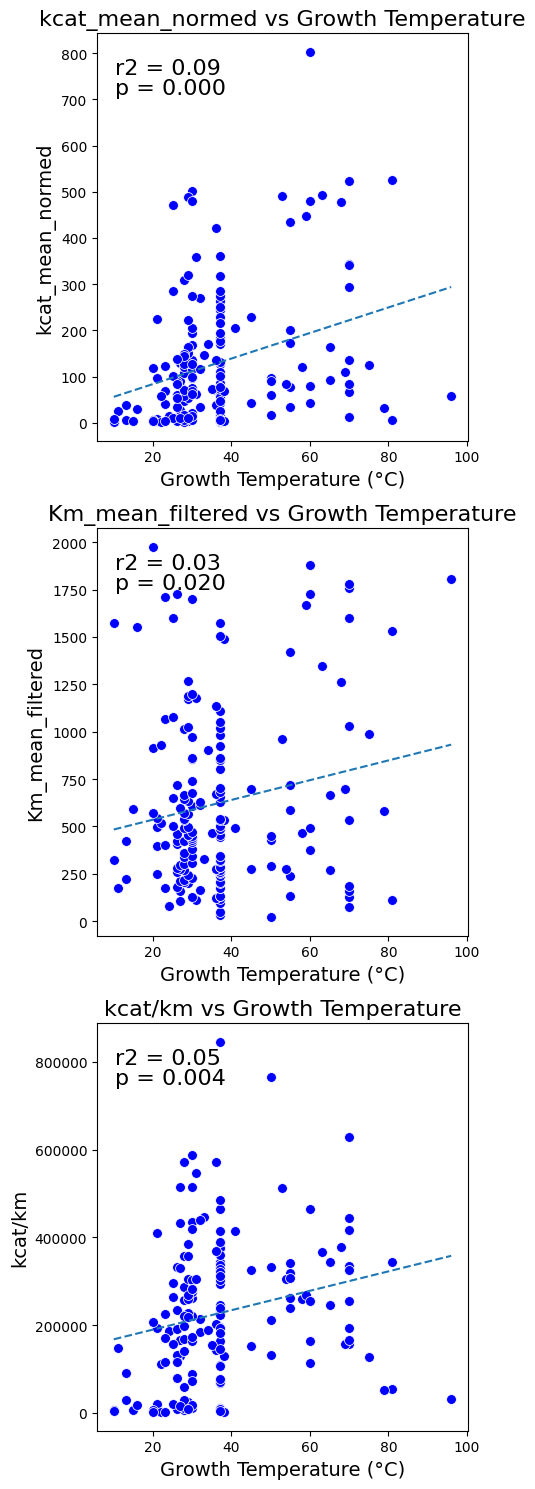

In [25]:
# same as above but as a 3 row 1 col figure with plots for Km and kcat/km
plt.figure(figsize=(5, 15))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

for ax, col in zip([ax1, ax2, ax3], ["kcat_mean_normed", "Km_mean_filtered", "kcat/km"]):

    sns.scatterplot(data=activity_df, x="temperature", y=col, s=50, ax=ax,c ="blue")
    # add line of best fit as dashed line and p value and r^2
    x = activity_df["temperature"]
    y = activity_df[col]
    # are there nans in x or y?
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_lin = np.linspace(min(x), max(x), 100)
    ax.plot(x_lin, x_lin * slope + intercept, '--')

    # add labels for r_value amd p_value
    ax.text(0.05, 0.9, f"r2 = {r_value**2:.2f}", transform=ax.transAxes, fontsize=16)
    ax.text(0.05, 0.85, f"p = {p_value:.3f}", transform=ax.transAxes, fontsize=16)

    ax.set_xlabel("Growth Temperature (°C)", fontsize=14)
    ax.set_ylabel(col, fontsize=14)   
    ax.set_title(f"{col} vs Growth Temperature", fontsize=16)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("/home/dmuir/code/adk_evolutionary_landscape/data/fig_pdfs/temp_correlations.pdf")
  

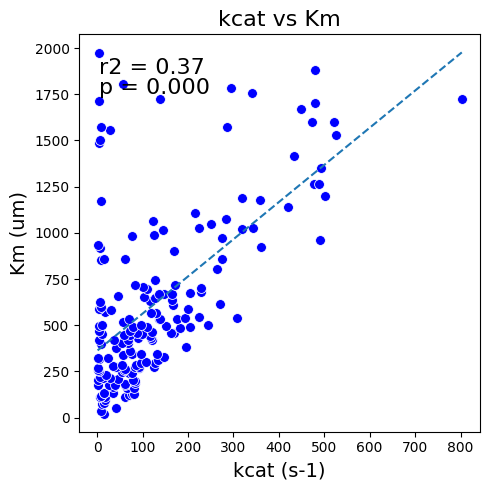

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(data=activity_df, x="kcat_mean_normed", y="Km_mean_filtered", s=50, ax=ax,c ="blue")
# add line of best fit as dashed line and p value and r^2
x = activity_df["kcat_mean_normed"]
y = activity_df["Km_mean_filtered"]
# are there nans in x or y?
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_lin = np.linspace(min(x), max(x), 100)
ax.plot(x_lin, x_lin * slope + intercept, '--')

# add labels for r_value amd p_value
ax.text(0.05, 0.9, f"r2 = {r_value**2:.2f}", transform=ax.transAxes, fontsize=16)
ax.text(0.05, 0.85, f"p = {p_value:.3f}", transform=ax.transAxes, fontsize=16)

ax.set_xlabel("kcat (s-1)", fontsize=14)
ax.set_ylabel("Km (um)", fontsize=14)   
ax.set_title(f"kcat vs Km", fontsize=16)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("/home/dmuir/code/adk_evolutionary_landscape/data/fig_pdfs/kcat_km_correlation.pdf")

In [14]:
cons_included_df[cons_included_df["org_name"] == "consensus_adk"]["kcat_mean_normed"].values[0]

5.389257151

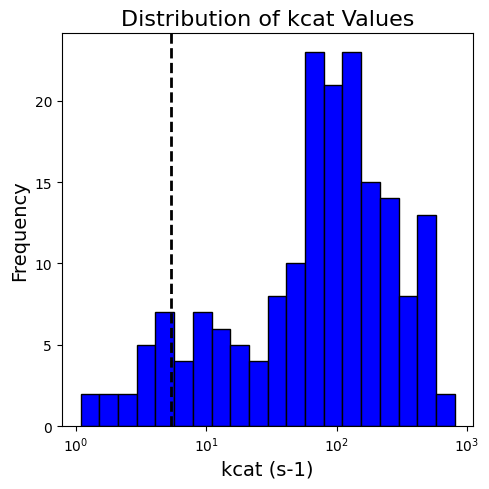

In [15]:
# histogram of kcat
plt.figure(figsize=(5, 5))
plt.hist(np.log10(activity_df["kcat_mean_normed"]), bins=20, color="blue", edgecolor="black")
plt.xlabel("kcat (s-1)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# change tick labels to be 10^x
# only show whole number tick labels
plt.gca().set_xticks(range(0, 4))
plt.gca().set_xticklabels([f"$10^{{{int(i)}}}$" for i in plt.gca().get_xticks()])
plt.title("Distribution of kcat Values", fontsize=16)
# add median lines
plt.axvline(np.log10(cons_included_df[cons_included_df["org_name"] == "consensus_adk"]["kcat_mean_normed"].values[0]), color="black", linestyle="--", linewidth=2)

# plt.text(np.log10(activity_df["kcat_mean_normed"].median()) + 0.1, 17, "Median", fontsize=12)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/kcat_distribution.pdf")


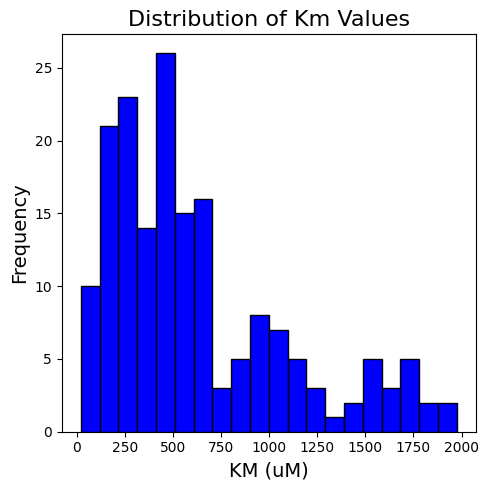

In [31]:
# histogram of Km
plt.figure(figsize=(5, 5))
plt.hist(activity_df["Km_mean_filtered"], bins=20, color="blue", edgecolor="black")
plt.xlabel("KM (uM)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# change tick labels to be 10^x
# only show whole number tick labels
# plt.gca().set_xticks(range(1, 4))
# plt.gca().set_xticklabels([f"$10^{{{int(i)}}}$" for i in plt.gca().get_xticks()])
plt.title("Distribution of Km Values", fontsize=16)
# add median lines
# plt.axvline(activity_df["Km_mean_filtered"].median(), color="black", linestyle="--", linewidth=2)
# plt.text(activity_df["Km_mean_filtered"].median() + 0.1, 17, "Median", fontsize=12)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/km_distribution.pdf")


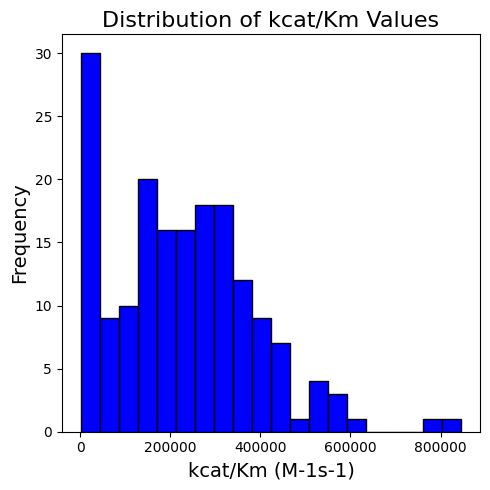

In [34]:
# histogram of kcat/km
plt.figure(figsize=(5, 5))
plt.hist(activity_df["kcat/km"], bins=20, color="blue", edgecolor="black")
plt.xlabel("kcat/Km (M-1s-1)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# change tick labels to be 10^x
# only show whole number tick labels
# plt.gca().set_xticks(range(1, 4))
# plt.gca().set_xticklabels([f"$10^{{{int(i)}}}$" for i in plt.gca().get_xticks()])
plt.title("Distribution of kcat/Km Values", fontsize=16)
# add median lines
# plt.axvline(activity_df["kcat/km"].median(), color="black", linestyle="--", linewidth=2)
# plt.text(activity_df["kcat/km"].median() + 0.1, 17, "Median", fontsize=12)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/kcat_km_distribution.pdf")